Sampling Rate: 48000 Hz
Length of the voice signal: 1360512 samples


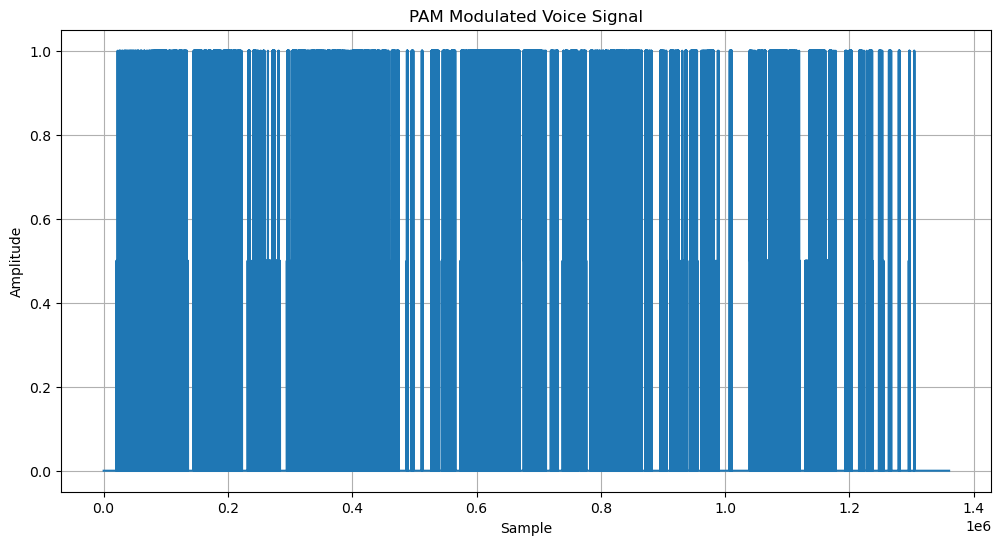

In [35]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the recorded audio file
file_path = 'my_audio.wav'  # Update this with your file path
voice_signal, sampling_rate = librosa.load(file_path, sr=None)  # sr=None keeps original sampling rate
print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Length of the voice signal: {len(voice_signal)} samples")

# Step 2: Perform PAM Modulation
def pam_modulate(signal, amplitude_levels):
    return np.array([amplitude_levels[int(sample * (len(amplitude_levels) - 1) / np.max(signal))] for sample in signal])

# Define amplitude levels for PAM
amplitude_levels = [0, 0.5, 1.0]
modulated_signal = pam_modulate(voice_signal, amplitude_levels)

# Plot the modulated signal
plt.figure(figsize=(12, 6))
plt.plot(modulated_signal)
plt.title('PAM Modulated Voice Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


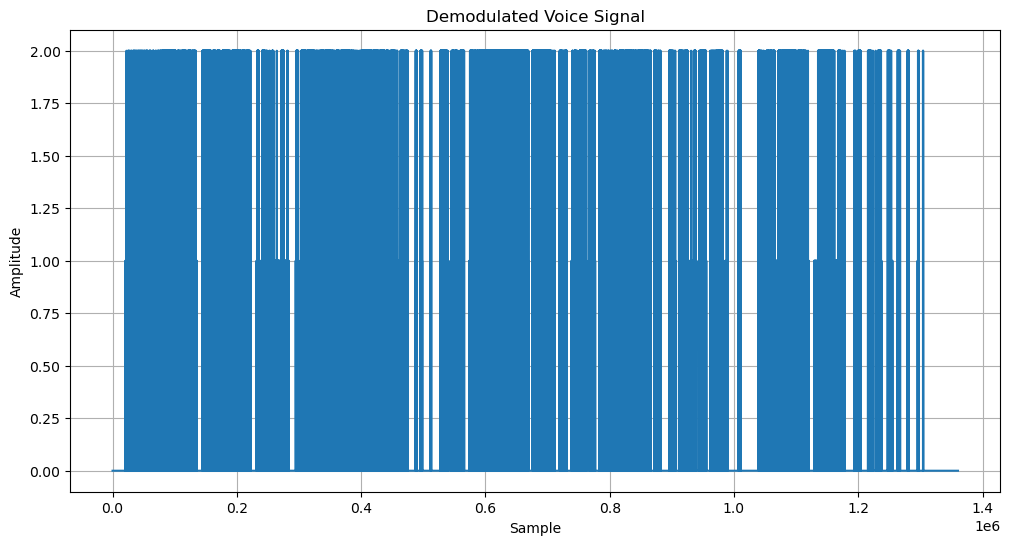

In [37]:
# Step 3: PAM Demodulation
def pam_demodulate(modulated_signal, threshold):
    return np.array([np.argmax(np.array(amplitude_levels) >= sample) for sample in modulated_signal])

# Demodulate the signal
threshold = 0.25  # Set an appropriate threshold
demodulated_signal = pam_demodulate(modulated_signal, threshold)

# Plot the demodulated signal
plt.figure(figsize=(12, 6))
plt.plot(demodulated_signal)
plt.title('Demodulated Voice Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

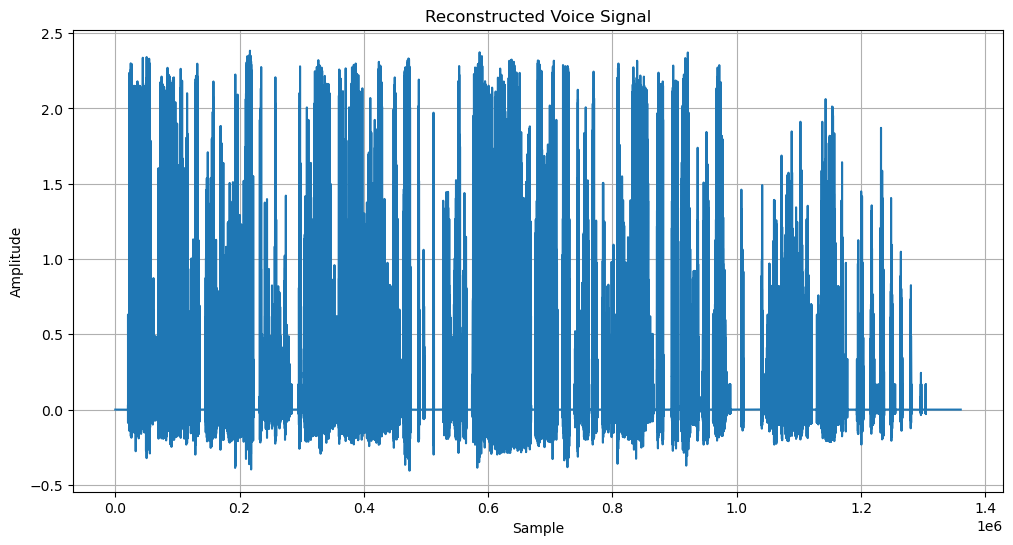

In [39]:
# Step 4: Signal Reconstruction
def lowpass_filter(data, cutoff, fs, order=5):
    from scipy.signal import butter, filtfilt
    
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Reconstruct the signal using a low-pass filter
cutoff_frequency = 2000  # Hz
reconstructed_signal = lowpass_filter(demodulated_signal, cutoff_frequency, sampling_rate)

# Plot the reconstructed signal
plt.figure(figsize=(12, 6))
plt.plot(reconstructed_signal)
plt.title('Reconstructed Voice Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [43]:
noise = np.random.normal(0, 0.01, len(voice_signal))
noisy_signal = voice_signal + noise  # Add small noise for SNR calculation

# Signal-to-Noise Ratio (SNR)
def calculate_snr(original, noisy_version):
    noise = original - noisy_version
    noise_power = np.sum(noise**2)
    if noise_power == 0:
        return np.inf
    snr = 10 * np.log10(np.sum(original**2) / noise_power)
    return snr
# Calculate SNR for noisy signal (before modulation) and demodulated signal
snr_before = calculate_snr(voice_signal, noisy_signal)
snr_after = calculate_snr(voice_signal, demodulated_signal)

print(f"SNR Before Modulation: {snr_before} dB")
print(f"SNR After Modulation and Demodulation: {snr_after} dB")

SNR Before Modulation: 29.029954950345115 dB
SNR After Modulation and Demodulation: -6.648705685388156 dB


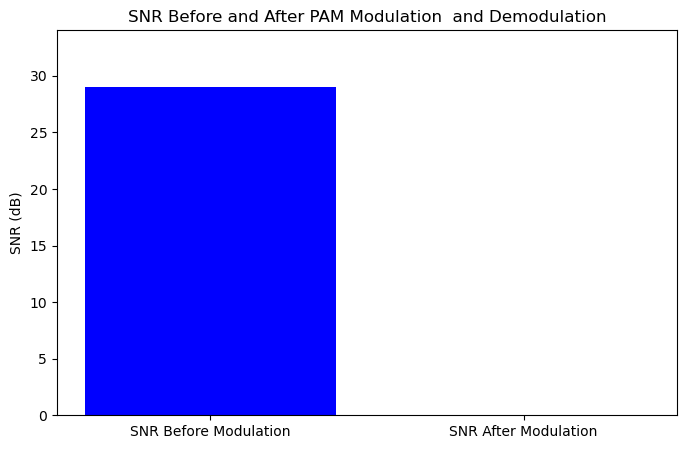

In [29]:
# Plot the SNR values
plt.figure(figsize=(8, 5))
snr_values = [snr_before, snr_after]
labels = ['SNR Before Modulation', 'SNR After Modulation']
plt.bar(labels, snr_values, color=['blue', 'red'])
plt.ylabel('SNR (dB)')
plt.title('SNR Before and After PAM Modulation  and Demodulation')
plt.ylim(0, max(snr_values) + 5)
plt.show()